# Assignment 1
### Rodolfo Lerma

## Linear Regression Analysis

In this analysis, we will perform linear regression using gradient descent. Linear regression is a method used to model the relationship between a scalar dependent variable `Y` and one or more explanatory variables denoted `X`. The case of one explanatory variable is called simple linear regression.

## Objective

The goal is to find the linear relationship:

$$ Y = mX + b $$

where `m` is the slope of the line and `b` is the y-intercept.

## Step 1: Plotting the Data Points

Before we begin the regression, it's important to visualize the data. This helps to give us an idea of the relationship between `X` and `Y` and to determine whether a linear model would be appropriate.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

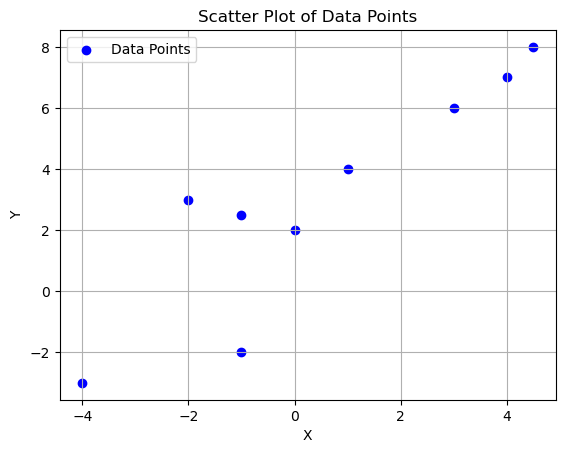

In [2]:
# Given data points
X = np.array([1, -2, 3, 4.5, 0, -4, -1, 4, -1])
Y = np.array([4, 3, 6, 8, 2, -3, -2, 7, 2.5])

# Plotting the data points
plt.scatter(X, Y, color='blue', label='Data Points')
plt.title('Scatter Plot of Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Step 2: Initializing Coefficients

We initialize the coefficients for the linear regression model. These are the slope `m` and the y-intercept `b`. Initially, we can start with zero or any small random values.

In [3]:
# Initializing coefficients
m = 0.0  # slope
b = 0.0  # y-intercept

## Step 3: Calculating the Cost Function

The cost function $J(\Theta) $ calculates the mean squared error between our model's predictions and the actual data. It's a measure of how well our model is performing.

In [4]:
# Function to compute the cost
def compute_cost(X, Y, m, b):
    total_cost = np.mean((Y - (m * X + b)) ** 2) / 2
    return total_cost

# Initial cost
initial_cost = compute_cost(X, Y, m, b)
print(f"Initial cost: {initial_cost}")

Initial cost: 10.958333333333334


## Step 4: Deriving the Gradient

The gradient of the cost function with respect to `m` and `b` tells us the direction in which we need to adjust our parameters to reduce the cost.

In [5]:
# Function to compute the gradient
def compute_gradient(X, Y, m, b):
    N = len(X)
    gradient_m = -np.mean(X * (Y - (m * X + b)))
    gradient_b = -np.mean(Y - (m * X + b))
    return (gradient_m, gradient_b)

# Compute initial gradient
initial_gradient = compute_gradient(X, Y, m, b)
print(f"Initial gradients: m = {initial_gradient[0]}, b = {initial_gradient[1]}")

Initial gradients: m = -10.166666666666666, b = -3.0555555555555554


## Step 5: Updating the Coefficients

Using the gradients, we update our coefficients. This step is repeated multiple times, and with each iteration, our model should improve.

In [6]:
# Learning rate and iterations
learning_rate = 0.01
iterations = 1000

# Gradient descent algorithm
for i in range(iterations):
    grad_m, grad_b = compute_gradient(X, Y, m, b)
    m -= learning_rate * grad_m
    b -= learning_rate * grad_b

print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")

Final slope (m): 1.1780415881659765
Final intercept (b): 2.466390964209572


## Step 6: Plotting the Regression Line

After finding the optimal coefficients, we can plot the regression line to see how it fits our data.

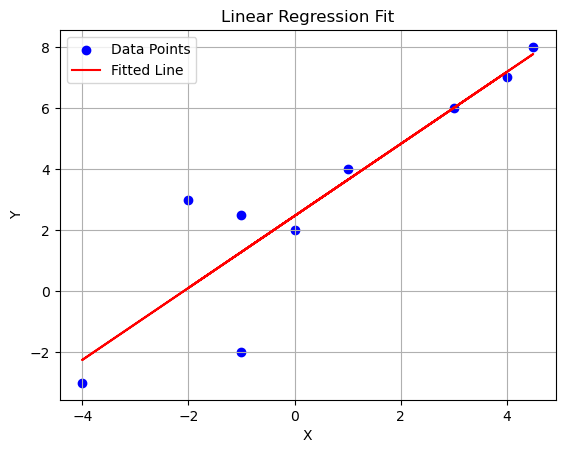

In [7]:
# Plotting the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, m * X + b, color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Comparison With a Regression using Scikit-learn (instead of Google Sheets)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
# Now we'll use scikit-learn to perform linear regression
X_reshaped = X.reshape(-1, 1)  # scikit-learn expects X to be a 2D array
sklearn_regr = LinearRegression()
sklearn_regr.fit(X_reshaped, Y)
Y_pred_sklearn = sklearn_regr.predict(X_reshaped)

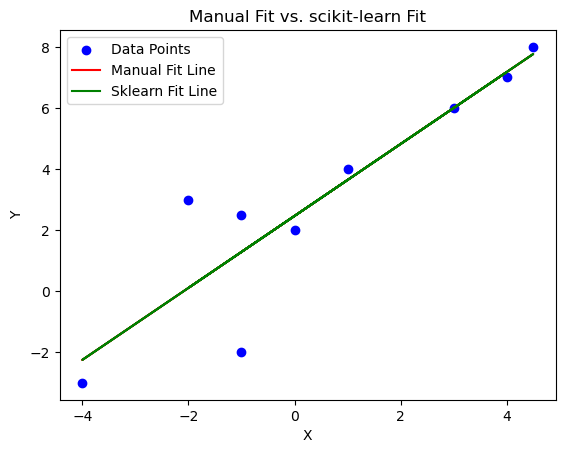

Manual slope: 1.1780, Manual intercept: 2.4664, Manual MSE: 2.4034
Sklearn slope: 1.1780, Sklearn intercept: 2.4665, Sklearn MSE: 2.4034


In [10]:
# Compare the two models
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, m*X + b, color='red', label='Manual Fit Line')
plt.plot(X, Y_pred_sklearn, color='green', label='Sklearn Fit Line')
plt.title('Manual Fit vs. scikit-learn Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Output the coefficients and MSE for both models
manual_mse = mean_squared_error(Y, m*X + b)
sklearn_mse = mean_squared_error(Y, Y_pred_sklearn)

print(f"Manual slope: {m:.4f}, Manual intercept: {b:.4f}, Manual MSE: {manual_mse:.4f}")
print(f"Sklearn slope: {sklearn_regr.coef_[0]:.4f}, Sklearn intercept: {sklearn_regr.intercept_:.4f}, Sklearn MSE: {sklearn_mse:.4f}")

#### Commentary:
In this case both methods have gotten to virtually the same answer, but it is important to consider other points as well:

- `Implementation Complexity:` Manual gradient descent requires more lines of code and a deeper understanding of the optimization process, whereas scikit-learn abstracts this complexity with a simple fit call.


- `Performance:` For larger datasets or more complex models, manual implementations may not perform as efficiently as optimized libraries like scikit-learn.


- `Flexibility:` While manual methods allow for customization at every step, scikit-learn provides a standard interface for different models, which might limit specific customizations.


- `Convergence:` The manual method requires careful selection of hyperparameters like the learning rate and number of iterations to ensure convergence, but scikit-learn's model optimizes these internally.


- `Numerical Stability:` Scikit-learn's methods are optimized for numerical stability and can handle edge cases that might not be immediately apparent in manual implementations.


- `Reproducibility:` Scikit-learn models are designed to be reproducible and consistent across different runs and datasets, while manual implementations might vary slightly due to the manual tuning of hyperparameters.